# EXPLORATORY DATA ANALYSIS 

## 1. Load Libraries

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar as cal

#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Load Data and Back-up

In [233]:
df = pd.read_csv('../data/interim/online_retail_cleaned.csv')
df_wrangled = df.copy()

## 3. Data Exploration

In [234]:
display(df.head())


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12


In [235]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392733 entries, 0 to 392732
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      392733 non-null  int64  
 1   StockCode    392733 non-null  object 
 2   Description  392733 non-null  object 
 3   Quantity     392733 non-null  int64  
 4   InvoiceDate  392733 non-null  object 
 5   Price        392733 non-null  float64
 6   CustomerID   392733 non-null  int64  
 7   Country      392733 non-null  object 
 8   Month        392733 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 27.0+ MB
None


In [236]:
display(df.describe())
print('0 price in the dataset: ',  np.sum(df.Price <= 0))

,Invoice,Quantity,Price,CustomerID,Month
count,392733.000000,392733.000000,392733.000000,392733.000000,392733.000000
mean,560591.125897,13.153687,3.125633,15287.728182,7.601946
std,13087.142969,181.588189,22.240710,1713.570644,3.415026
min,536365.000000,1.000000,0.000000,12346.000000,1.000000
25%,549234.000000,2.000000,1.250000,13955.000000,5.000000
50%,561874.000000,6.000000,1.950000,15150.000000,8.000000
75%,572061.000000,12.000000,3.750000,16791.000000,11.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,12.000000


0 price in the dataset:  40


Min in price is 0, and there's 40 records of it. Remove the rows from the dataset as it will impact the monetary component in the analysis.

In [237]:
df = df.query('Price > 0')

print('0 price in the dataset: ',  np.sum(df.Price <= 0))
df['Price'].describe()

0 price in the dataset:  0


count    392693.000000
mean          3.125952
std          22.241820
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: Price, dtype: float64

Transform Date Column Type and check range.

In [238]:
#Transform Invoice Date column to DateTime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.normalize()

print(min(df['InvoiceDate']), max(df['InvoiceDate']))

2010-12-01 00:00:00 2011-12-09 00:00:00


Filter dataset to only include dates later than 2011-01-01

In [239]:
#Remove records earlier than 2011-01-01
df  = df[df['InvoiceDate'] >= '2011-01-01']

Create Sales column as the product of quantity and price per item

In [240]:
#Create Sales column (Useful for RFM Analysis later)
df['Sales'] = df.Quantity * df.Price
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,Sales
25673,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313,United Kingdom,1,19.5
25674,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,1,10.5
25675,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,1,10.5
25676,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313,United Kingdom,1,10.5
25677,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313,United Kingdom,1,12.5


<font color = 'red'>Patterns in terms of weekend, weekday

Trend chart for sales

holiday dates for invoice

what happens in trend </font>

### 3.1 Summary Statistics

In [241]:
df.describe( include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,Sales
count,367023.000000,367023,367023,367023.000000,367023,367023.000000,367023.000000,367023,367023.000000,367023.000000
unique,NaN,3596,3784,NaN,NaN,NaN,NaN,36,NaN,NaN
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN
freq,NaN,1816,1809,NaN,NaN,NaN,NaN,325745,NaN,NaN
mean,562169.933830,NaN,NaN,13.189786,2011-07-25 03:02:48.816668416,3.124763,15271.672315,NaN,7.294273,22.660172
min,539993.000000,NaN,NaN,1.000000,2011-01-04 00:00:00,0.001000,12346.000000,NaN,1.000000,0.001000
25%,551776.000000,NaN,NaN,2.000000,2011-05-04 00:00:00,1.250000,13924.000000,NaN,5.000000,4.950000
50%,563246.000000,NaN,NaN,6.000000,2011-08-15 00:00:00,1.850000,15116.000000,NaN,8.000000,12.480000
75%,572652.000000,NaN,NaN,12.000000,2011-10-25 00:00:00,3.750000,16771.000000,NaN,10.000000,19.800000
max,581587.000000,NaN,NaN,80995.000000,2011-12-09 00:00:00,8142.750000,18287.000000,NaN,12.000000,168469.600000


In [242]:
#Summary statistics for Sales Column
df.Sales.describe()

count    367023.000000
mean         22.660172
std         321.143989
min           0.001000
25%           4.950000
50%          12.480000
75%          19.800000
max      168469.600000
Name: Sales, dtype: float64

In [243]:
#Evaluate categorical variables

print('Unique Invoices: ', df.Invoice.nunique())
print('Unique Countries: ', df.Country.nunique())
print('Unique StockCodes: ', df.StockCode.nunique())
print('Unique Customer IDs: ', df.CustomerID.nunique())

Unique Invoices:  17132
Unique Countries:  36
Unique StockCodes:  3596
Unique Customer IDs:  4219


In [244]:
# Extract monthly data 
# ms - monthly sales, 
# mq - monthly quantities
ms = df.groupby('Month')['Sales'].agg(['mean', 'median', 'sum']).reset_index()
ms


,Month,mean,median,sum
0,1,27.067911,12.60,568101.310
1,2,22.637010,13.20,446084.920
2,3,22.109481,12.75,594081.760
3,4,20.878809,12.75,468374.331
4,5,24.128349,15.00,677355.150
5,6,24.513335,12.60,660046.050
6,7,22.534345,12.50,598962.901
7,8,24.040726,13.91,644051.040
8,9,23.965570,13.52,950690.202
9,10,21.225226,10.50,1035642.450


In [245]:
mq = df.groupby('Month')['Quantity'].agg('sum')
mq = mq.reset_index()
mq


,Month,Quantity
0,1,348473
1,2,265027
2,3,347582
3,4,291366
4,5,372864
5,6,363014
6,7,367360
7,8,397373
8,9,543652
9,10,591543


Countplot per country
Missing values
Outliers
BNreakdown monthly. weekly, 

In [246]:
def cust_plot_params(axis, xax, yax, title=None, xlab=None, ylab=None):

    axis[xax][yax].set_title(title)
    # axis[xax][yax].set_xticks([i for i in np.arange(0, 12, 1)])
    # axis[xax][yax].set_xticklabels([cal.month_name[m] for m in np.arange(0,12,1)], rotation=90)
    axis[xax][yax].set_xlabel(xlab)
    axis[xax][yax].set_ylabel(ylab)


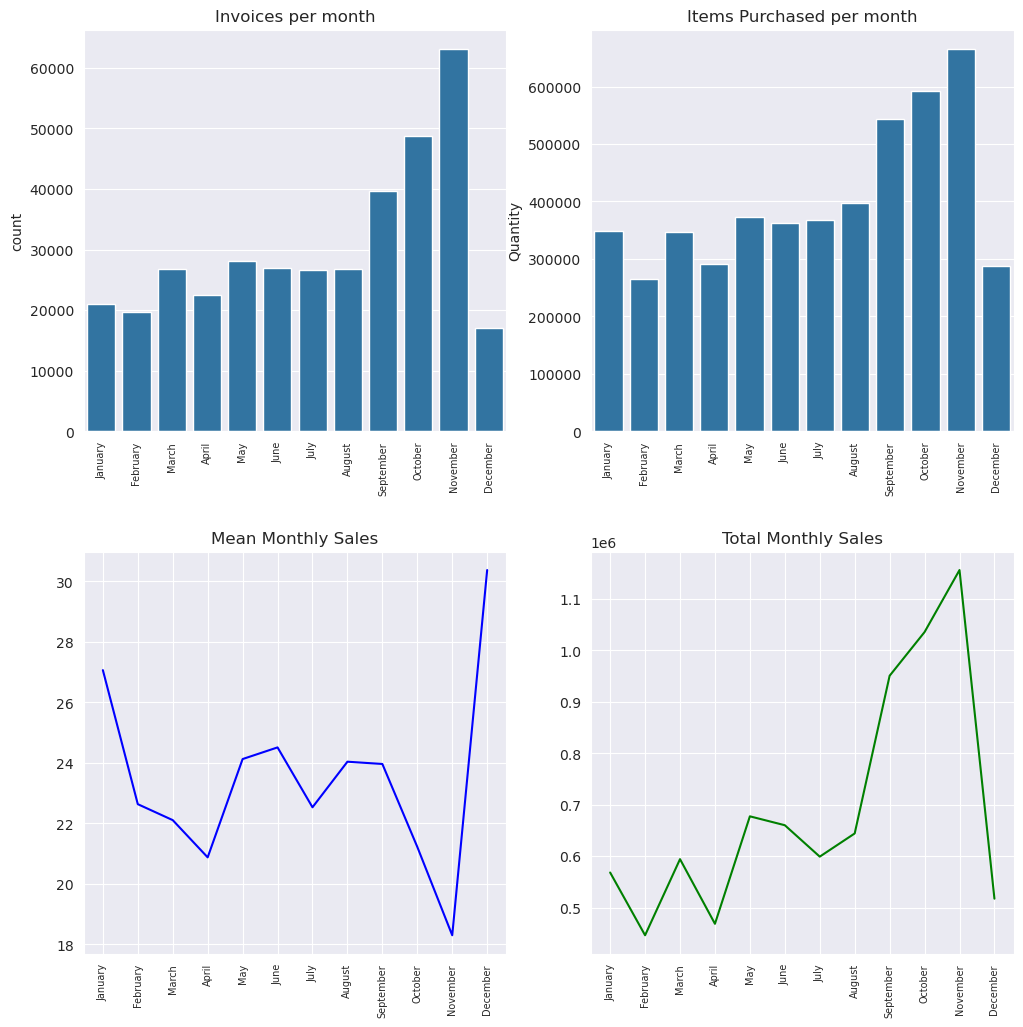

In [247]:
#Plot visuals

fig, ax = plt.subplots(2,2, figsize=(12,12))
fig.subplots_adjust(wspace=0.2, hspace=0.3)


sns.countplot(data=df, x=df.Month, ax=ax[0][0])
ax[0][0].set_title('Invoices per month')
ax[0][0].set_xticklabels([cal.month_name[i] for i in np.arange(1,13, 1)], rotation=90, size=7)
ax[0][0].set_xlabel('')

sns.barplot(data=mq, x=mq.Month, y=mq.Quantity, ax=ax[0][1])
ax[0][1].set_title('Items Purchased per month')
ax[0][1].set_xticklabels([cal.month_name[i] for i in np.arange(1,13, 1)], rotation=90, size=7)
ax[0][1].set_xlabel('')

ax[1][0].plot(ms['mean'], label='Average Sales', color='blue')
ax[1][0].set_xticks(ms.Month.values - 1) 
ax[1][0].set_xticklabels([cal.month_name[i] for i in ms.Month.values], size=7) 
ax[1][0].tick_params('x', labelrotation=90)
ax[1][0].set_title('Mean Monthly Sales')


ax[1][1].plot(ms['sum'], label='Total Sales', color='green')
ax[1][1].set_xticks(ms.Month.values - 1) 
ax[1][1].set_xticklabels([cal.month_name[i] for i in ms.Month.values], size=7) 
ax[1][1].tick_params('x', labelrotation=90)
ax[1][1].set_title('Total Monthly Sales')


plt.show()


Investigate the steep decline in sales for the month of December (which is unusual for the amount of Sales during this time of the year)

In [248]:
print('% of December Transactions: ', round(len(df.query('Month == 12')) * 100 / len(df), 2), '%')
print('Latest December Transaction: ', df.query('Month == 12')['InvoiceDate'].max() )

% of December Transactions:  4.64 %
Latest December Transaction:  2011-12-09 00:00:00


Most recent invoice was recorded only until Dec 9. The transactions in the dataset appear incomplete as it did not capture the whole transactions for the month of December 2011.

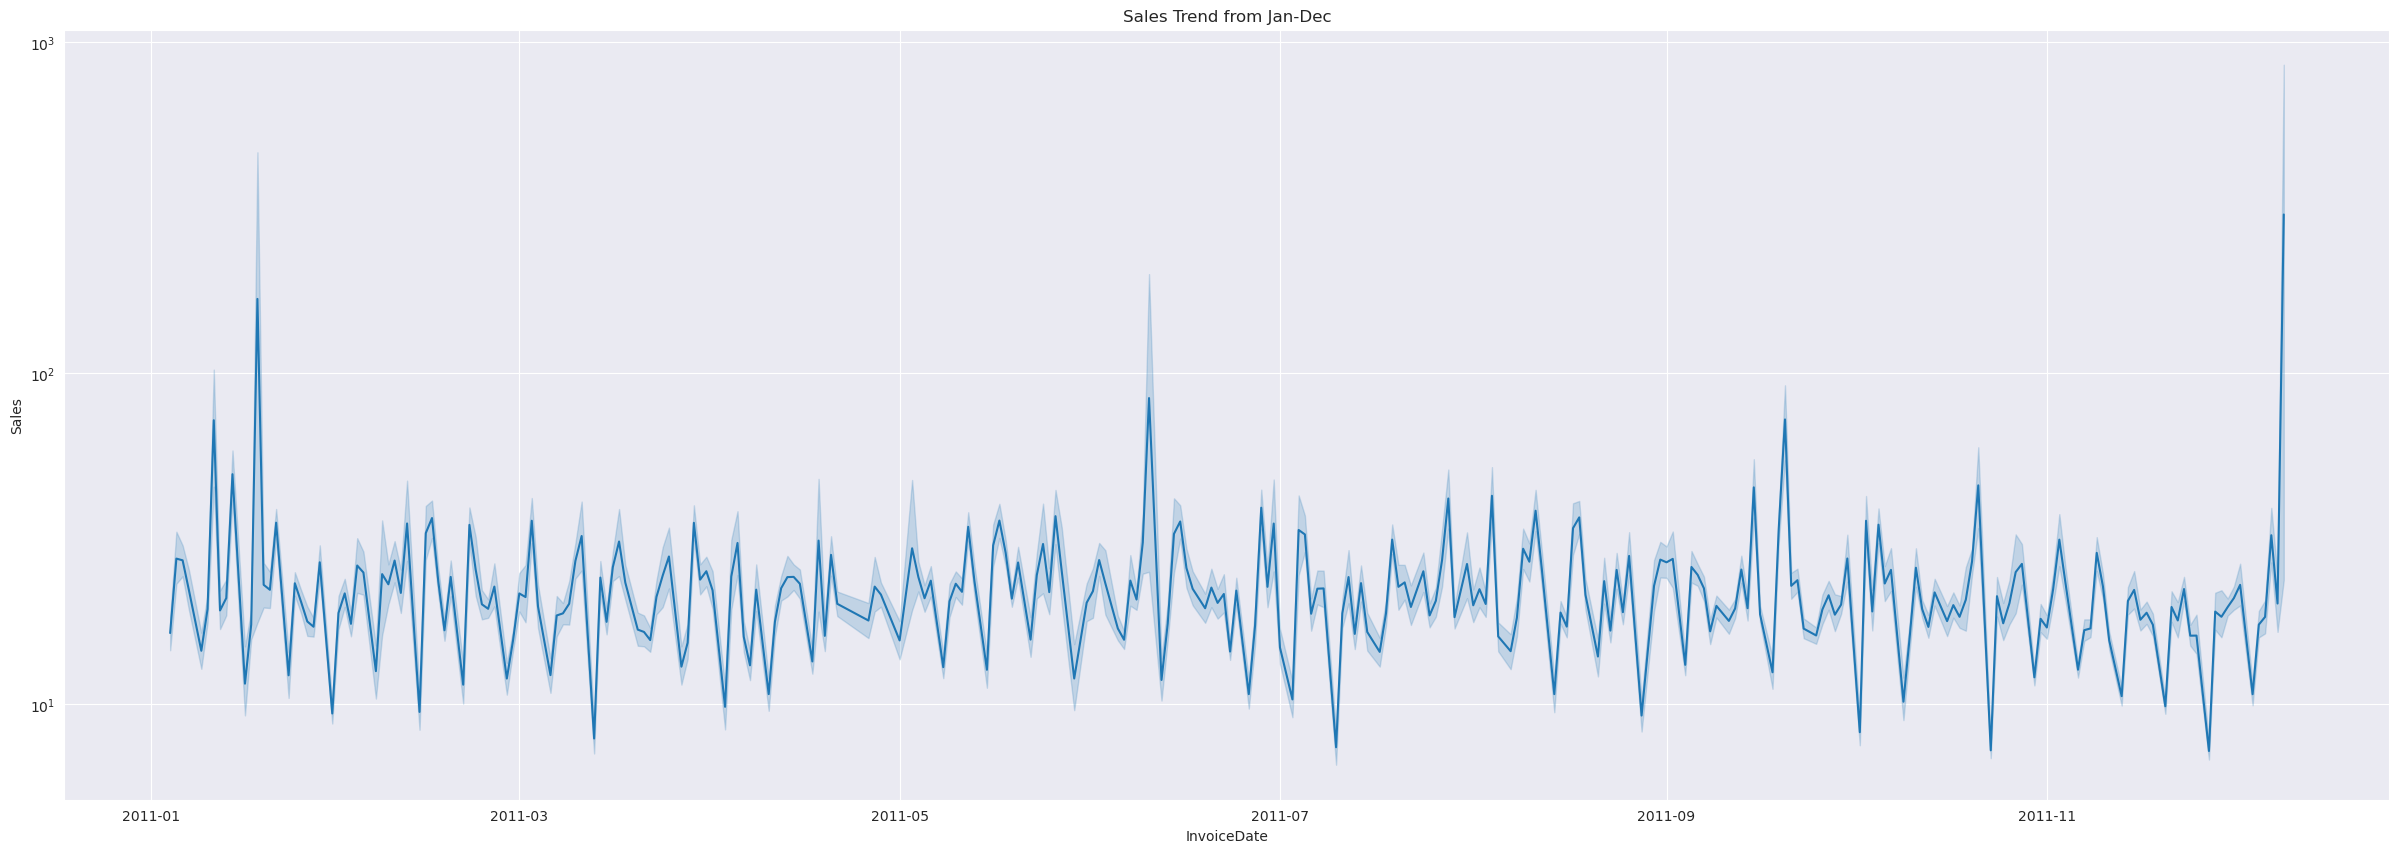

In [249]:
#Time Series Plot
fig, ax = plt.subplots(figsize=(30,10))
sns.lineplot(data=df, x=df.InvoiceDate, y=df.Sales)
ax.set_title('Sales Trend from Jan-Dec')
plt.yscale('log')
plt.show()

### 3.2 Analyzing Customer Transactions

In [250]:
df_percust = df.groupby('CustomerID', as_index=False) \
    .agg( 
        LastPurchaseDate = ('InvoiceDate', 'max'),
        Frequency = ('Invoice', 'nunique'),
        Monetary = ('Sales', 'sum'))

In [251]:
recent_invdt = df['InvoiceDate'].max() #Ideally, should be the latest day of invoice (near today's date)
df_percust['Recency'] = (recent_invdt - df_percust['LastPurchaseDate']).dt.days
df_percust.head()

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
0,12346,2011-01-18,1,77183.60,325
1,12347,2011-12-07,6,3598.21,2
2,12348,2011-09-25,3,904.44,75
3,12349,2011-11-21,1,1757.55,18
4,12350,2011-02-02,1,334.40,310


Text(0.5, 1.0, 'Monetary Boxplot')

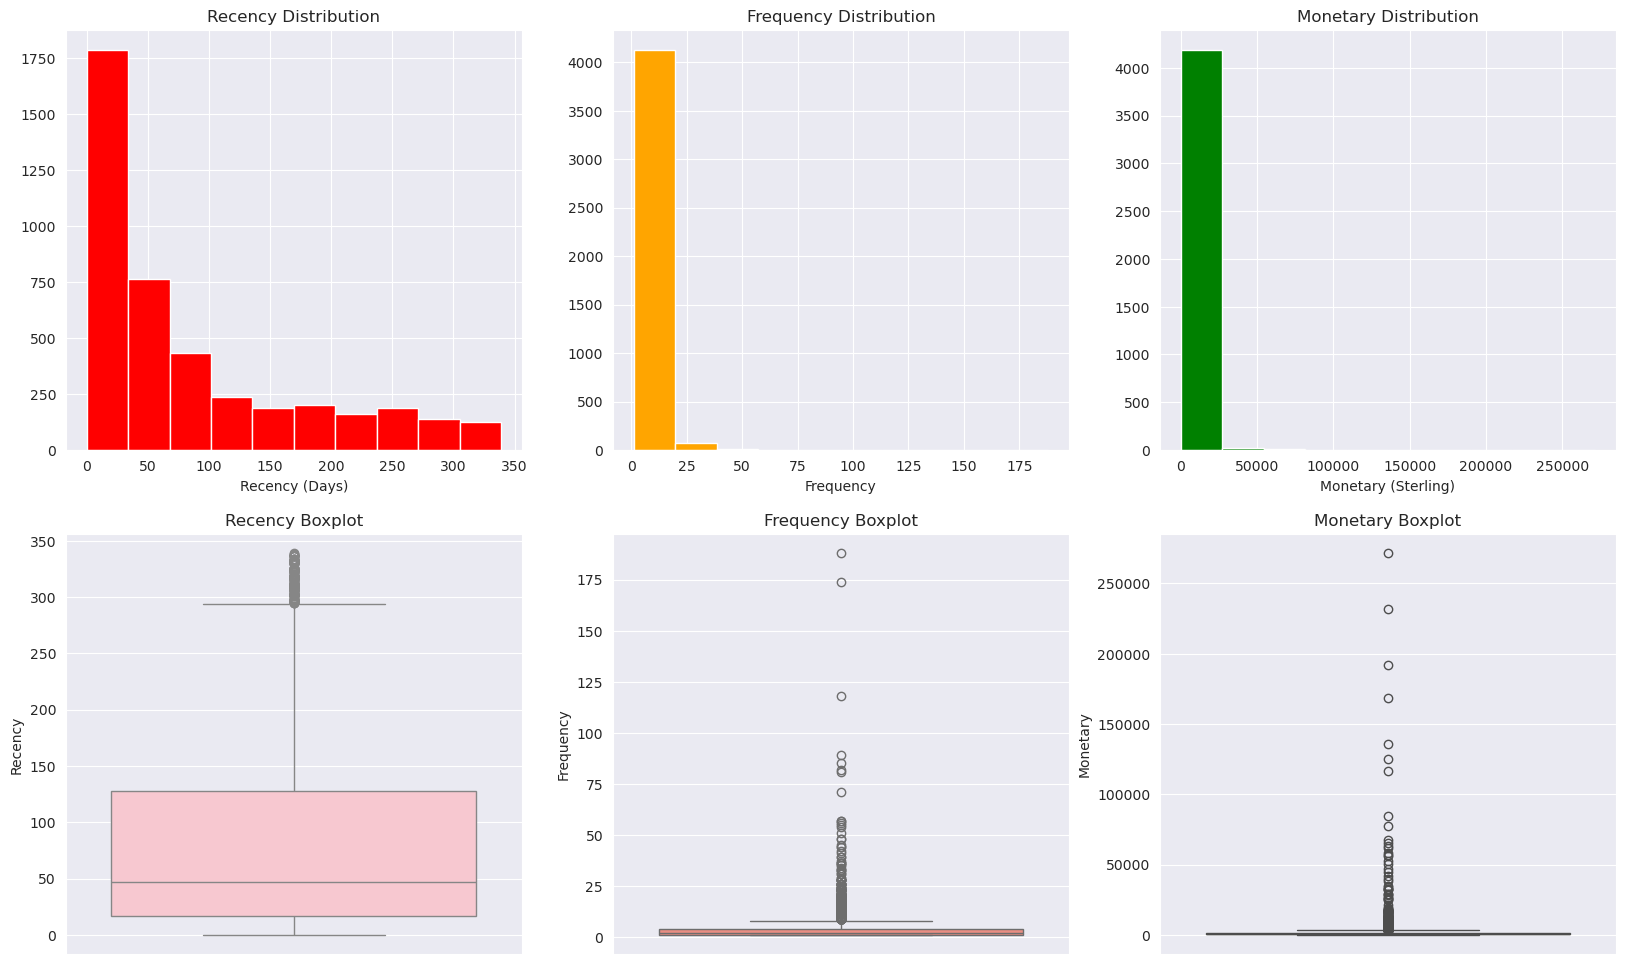

In [252]:
fig, ax= plt.subplots(2,3, figsize=(20,12))

#Recency
ax[0][0].hist(df_percust.Recency, bins=10, color='red')
ax[0][0].set_xlabel('Recency (Days)')
ax[0][0].set_title('Recency Distribution')
sns.boxplot(data=df_percust.Recency, color='pink', ax=ax[1,0])
ax[1][0].set_title('Recency Boxplot')

#Frequency
ax[0][1].hist(df_percust.Frequency, bins=10, color='orange')
ax[0][1].set_xlabel('Frequency')
ax[0][1].set_title('Frequency Distribution')
sns.boxplot(data=df_percust.Frequency, color='salmon', ax=ax[1,1])
ax[1][1].set_title('Frequency Boxplot')

#Monetary
ax[0][2].hist(df_percust.Monetary, bins=10, color='green')
ax[0][2].set_xlabel('Monetary (Sterling)')
ax[0][2].set_title('Monetary Distribution')
sns.boxplot(data=df_percust.Monetary, color='lime', ax=ax[1,2])
ax[1][2].set_title('Monetary Boxplot')


### 3.3 Prepare for Pre-processing ###

Both the histogram and boxplots indicate the presence of outliers, which should be discarded before the clustering activity

In [253]:
#Create a function for extracting outliers
def outliers(p_df, col):
    '''Function for computing outliers. 
    Input: (1)Dataframe, (2)column name.
    Return: rows of outliers in a dataframe'''

    q1 = p_df[col].quantile(0.25)
    q3 = p_df[col].quantile(0.75)
    iqr = q3 - q1
    outlier = p_df[( p_df[col] > (q3 + 1.5*iqr)) | (p_df[col] < (q1 - 1.5*iqr)) ]
    return outlier

Get the Monetary outliers - big spenders

In [254]:
#Big spenders: Monetaty outliers
m_outliers = outliers(df_percust, 'Monetary')
m_outliers.describe()

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
count,402.000000,402,402.000000,402.000000,402.000000
mean,14936.164179,2011-11-16 16:10:44.776119296,15.666667,12455.951393,22.325871
min,12346.000000,2011-01-18 00:00:00,1.000000,3579.860000,0.000000
25%,13148.750000,2011-11-16 00:00:00,7.000000,4348.825000,3.000000
50%,14822.500000,2011-11-29 00:00:00,11.000000,5705.910000,10.000000
75%,16567.000000,2011-12-06 00:00:00,18.000000,9453.270000,23.000000
max,18251.000000,2011-12-09 00:00:00,188.000000,271614.140000,325.000000
std,1822.391268,NaN,17.904243,25731.030346,36.946693


Get the Frequency outliers - frequent spenders


In [255]:
#Frequent buyers: Frequency outliers
f_outliers = outliers(df_percust, 'Frequency')
f_outliers.describe()

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
count,412.000000,412,412.000000,412.000000,412.000000
mean,15301.546117,2011-11-22 21:08:44.271844608,17.497573,10447.621019,16.118932
min,12362.000000,2011-05-06 00:00:00,9.000000,726.690000,0.000000
25%,13840.000000,2011-11-18 00:00:00,10.000000,3033.735000,3.000000
50%,15188.000000,2011-12-01 00:00:00,12.500000,4579.930000,8.000000
75%,16813.250000,2011-12-06 00:00:00,18.000000,7802.932500,21.000000
max,18283.000000,2011-12-09 00:00:00,188.000000,271614.140000,217.000000
std,1748.219986,NaN,16.868967,24204.798934,25.146441


Subset the non-outliers

In [259]:
df_non_ol = df_percust[ (~df_percust.index.isin(f_outliers.index)) &  (~df_percust.index.isin(m_outliers.index)) ]
print(f'No. of Non-outlier records:  {len(df_non_ol)} from {len(df_percust)} or {round(len(df_non_ol)*100/len(df_percust),2)} %' )

No. of Non-outlier records:  3674 from 4219 or 87.08 %


Plot the histograms of new the dataset where outliers are removed.

<Axes: ylabel='Monetary'>

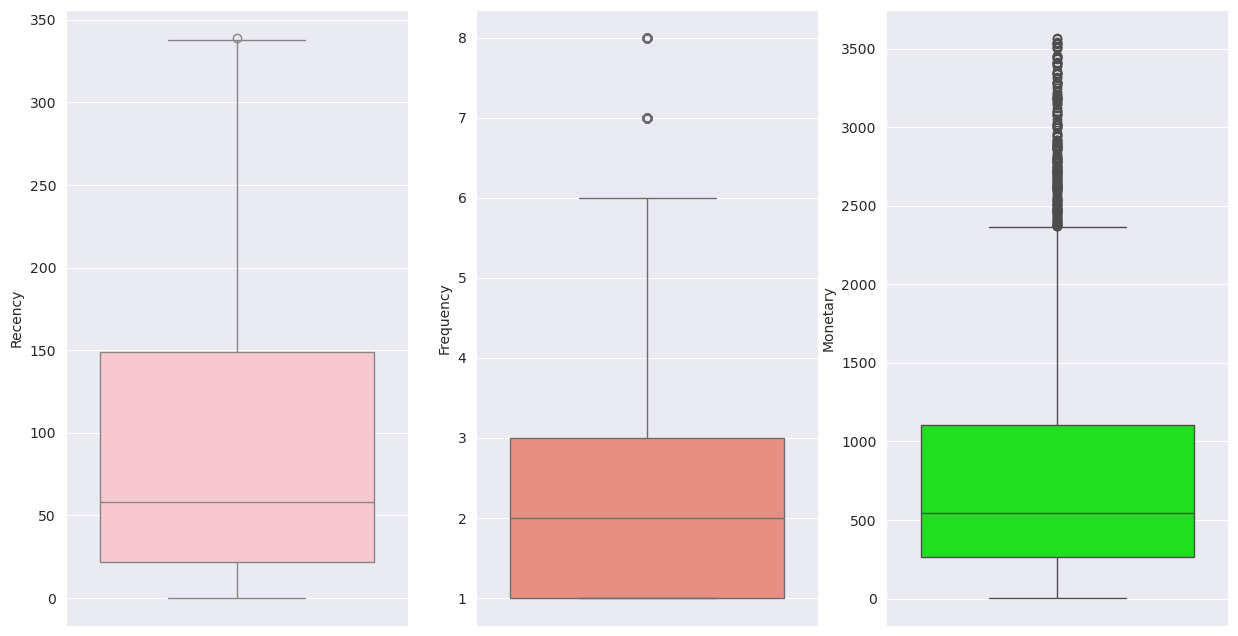

In [257]:
fig, ax = plt.subplots(1,3, figsize=(15,8))

sns.boxplot(data=df_non_ol.Recency, color='pink', ax=ax[0])
sns.boxplot(data=df_non_ol.Frequency, color='salmon', ax=ax[1])
sns.boxplot(data=df_non_ol.Monetary, color='lime', ax=ax[2])

There are many outliers as can be seen from the R/F/M boxplots.  A separate analysis should be performed as they represent extreme behaviours by the customers, such as very big spending and very frequent purchases.

Plot a 3D scatterplot of the columns of interest - Recency,Frequenct, and Monetary.

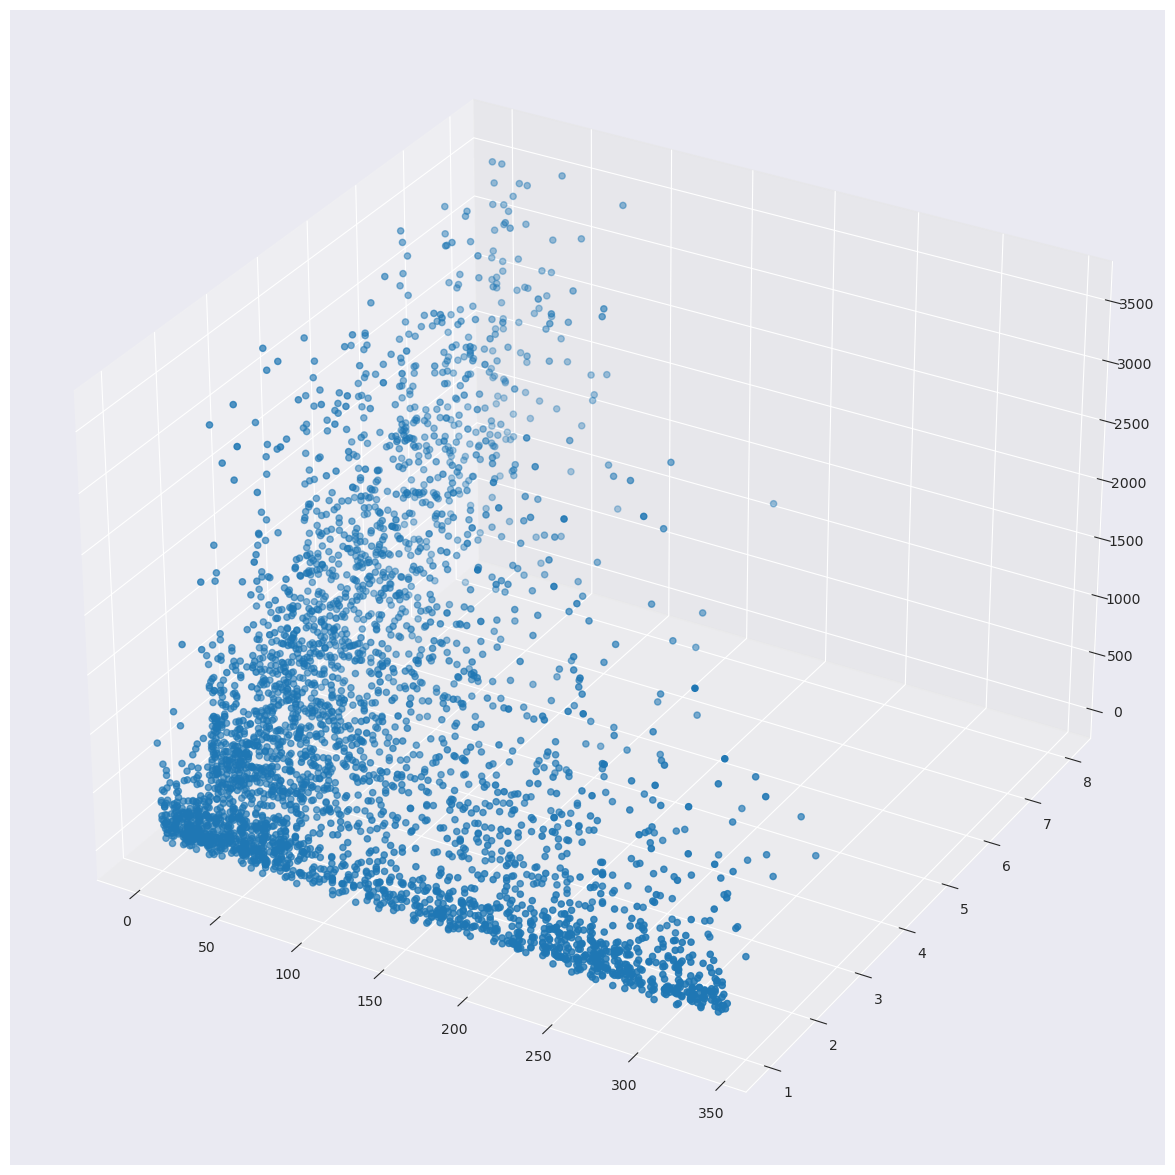

In [260]:
sns.set_style ("darkgrid")
plt.figure (figsize = (15,15))
seaborn_plt = plt.axes (projection='3d')
seaborn_plt.scatter3D(df_non_ol.Recency, df_non_ol.Frequency, df_non_ol.Monetary)

Save the completed EDA to a file. Note: The dataset has been rid of outliers.

In [258]:
df_nol.to_csv("../data/interim/online_retail_EDA.csv",  index=False)